# Regresión logística en línea

En este notebook se muestra un ejemplo de regresión logística usando "stochastic gradient descent", lo que nos permite hacer el entrenamiento usando una muestra a la vez, y así, no cargar todo el dataset en memoria.

Para mantener las cosas simples y didácticas, vamos a utilizar un dataset pequeño llamado 'iris.csv'. El dataset contiene las características de tres diferentes variedades de la planta iris y el objetivo es clasificarla en base a sus características.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#--para escalar o estandarizar los datos
from sklearn.preprocessing import StandardScaler
#--para comparar nuestro algoritmo con la solución exacta
from sklearn.linear_model import LogisticRegression

%matplotlib inline

Vamos a cargar todo el dataset en memoria para hacer el código más sencillo y comprensible. Cuando tengamos un dataset grande, lo único que tenemos que hacer es leerlo por partes y hacer el procesamiento pertinente, tal como se mostro en notebooks anteriores.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#--cargamos el dataset y vemos sus características
dat = pd.read_csv('/content/drive/MyDrive/data_sets/iris.csv')
print(dat.head(3))
print('-------------------')
print(dat.describe())
print('-------------------')
print(dat.info())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
-------------------
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------      

Realizaremos una clasificación binaria, por lo que solo utilizaremos las muestras que pertencen a la variedad 'setosa' y 'versicolor'. Además para poder visualizar los resultados solo utilizaremos dos atributos de los cuatro disponibles.

In [4]:
#--seleccionamos las muestras de 'setosa' y 'versicolor'
dat = dat[(dat.species=='setosa') | (dat.species=='versicolor')]

In [5]:
#--debido a que vamos a utilizar SGD es importante escalar los atributos
scaler = StandardScaler()

X = scaler.fit_transform(dat.drop('species', axis = 1))
y = dat[['species']].values == 'setosa'
y = np.squeeze(y)

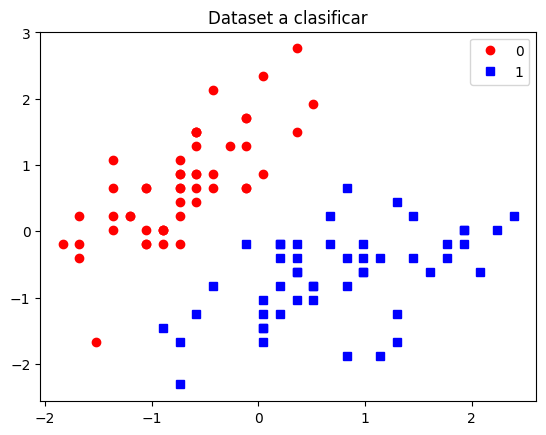

In [6]:
#--plotemos las muestras que vamos a classificar
plt.plot(X[y,0], X[y,1], 'ro', label='0')
plt.plot(X[~y,0], X[~y,1], 'bs', label='1')
plt.title('Dataset a clasificar')
plt.legend();

## Solución exacta
Usamos sklearn para obtener la solución exacta y después compararla con nuestros resultados

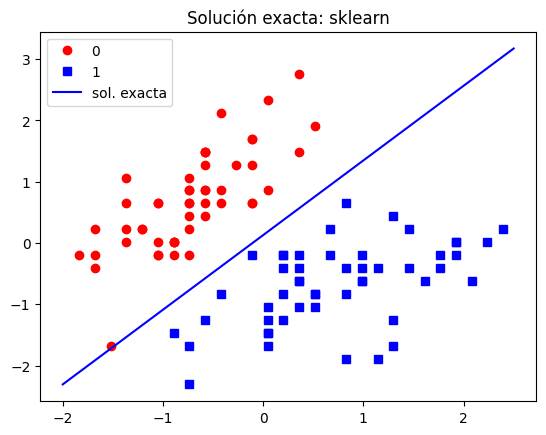

In [7]:
#--definimos nuestro clasificador
clf = LogisticRegression()
#--entrenamos
clf.fit(X=X[:,:2], y=y)
#--obtenemos la ordenada al origen y la pendiente para dibujar el
#-límite de decisión
c = -clf.intercept_ / clf.coef_[0,1]
m = -clf.coef_[0,0] / clf.coef_[0,1]
#--definimos los extremos de la línea que queremos dibujar
x_bound = np.array([-2.0, 2.5])
y_bound_exact = m * x_bound + c

#--ploteamos
plt.plot(X[y,0], X[y,1], 'ro', label='0')
plt.plot(X[~y,0], X[~y,1], 'bs', label='1')
plt.plot(x_bound, y_bound_exact, 'b-', label='sol. exacta')
plt.legend()
plt.title('Solución exacta: sklearn');

## Regresión logística en línea: SGD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.001    # Learning rate
epochs = 1000     # Number of iterations over the entire dataset

# Variable response (binary classification target variable)
y = dat['Ozone']  # This should be a binary target (0 or 1)
m = y.shape[0]    # Number of samples

# Add a column of ones to the training set for the intercept term
X = np.ones((m, 2))
X[:, 1:] = dat_scaled  # Assuming dat_scaled is your feature set

# Initialize thetas (parameters) as zeros
thetas = np.zeros((2, 1))

# Sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Iterate over epochs
for i in range(epochs):
    # Iterate over each sample in the training set (stochastic gradient descent)
    for j in range(m):
        # Calculate the predicted probability using the sigmoid function
        y_hat = sigmoid(np.dot(X[None, j, :], thetas))  # Predicted probability for sample j
        
        # Compute the error (difference between predicted and actual label)
        error = y_hat - y[j]
        
        # Update the thetas (parameters) using the gradient of the logistic loss function
        thetas = thetas - alpha * np.dot(X[None, j, :].T, error)

# Make predictions for new sample (assuming new_sample_ones has the intercept term)
y_hat = sigmoid(np.dot(new_sample_ones, thetas))

# Plot the results
plt.plot(dat_scaled, dat['Ozone'], 'bo', label='Data')
plt.plot(new_sample, y_hat_exacto, 'k-', label='Exact')
plt.plot(new_sample, y_hat, 'r--', label='Stochastic Gradient Descent')
plt.legend()
plt.show()
